# Import libraries

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Reading the files

In [2]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')

# EDA

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

Understanding the data we are working with

In [3]:
traindata.shape

(891, 12)

In [4]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
traindata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Checking for any null values

In [6]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Dropping duplicates from the table

In [9]:
traindata.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Overall survival rate of the passengers

38.38% survived


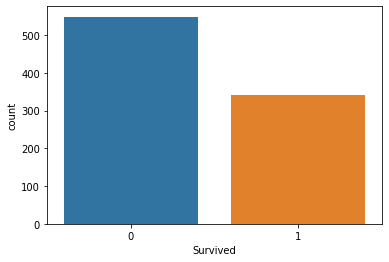

In [10]:
sns.countplot(x =traindata['Survived'])
survived=float(traindata[traindata['Survived']==1]['Survived'].count()/traindata[['Survived']].count())*100
print(str(round(survived,2))+'% survived')

# Nominal data

(Only 2 classes) Sex

In [11]:
survived_by_gender = traindata.groupby(['Sex','Survived'])['Survived'].count()
survival_rate_by_gender = pd.Series({'female': survived_by_gender[1]/(survived_by_gender[0]+survived_by_gender[1]), 
                           'male': survived_by_gender[3]/(survived_by_gender[2]+survived_by_gender[3])})

print(survived_by_gender, '\n')
print(survival_rate_by_gender)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64 

female    0.742038
male      0.188908
dtype: float64


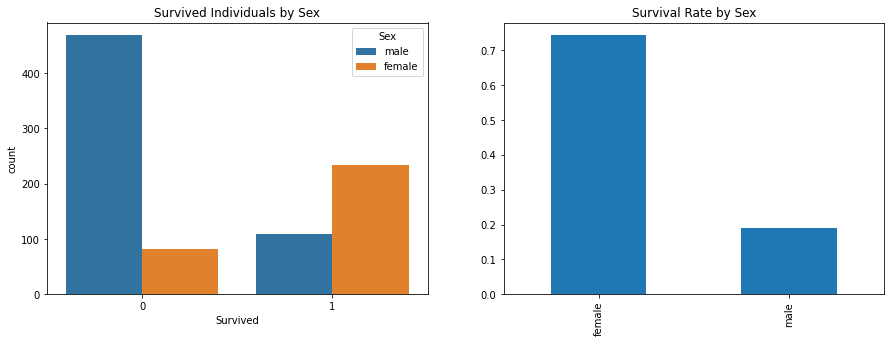

In [12]:
f,ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(ax=ax[0], x="Survived",data=traindata,hue="Sex")
ax[0].set_title('Survived Individuals by Sex')

survival_rate_by_gender.plot.bar(ax=ax[1])
ax[1].set_title('Survival Rate by Sex')

plt.show()

Encoding gender into binary values, male being 1 and 0 being female.

In [13]:
combine = [traindata, testdata]

In [14]:
for data in combine:
    data['Sex'] = data['Sex'].replace(['male','female'],[1,0])

# Ordinal data

Pclass, Embarked

In [15]:
for data in combine:
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
    
traindata.drop('PassengerId',axis=1,inplace=True)
    
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


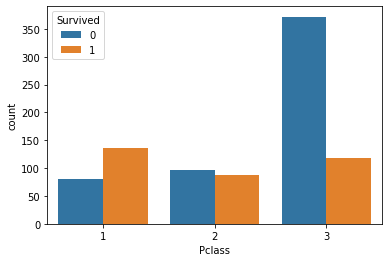

In [16]:
sns.countplot(x='Pclass',data = traindata, hue='Survived')
plt.show()

In [17]:
survival_rate_by_pclass = traindata.groupby(['Pclass'])['Survived'].mean()

print(survival_rate_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


From the results above, we can see that Passenger Class 1 has the highest chance of survival of 63%, followed by Passenger Class 2 with 47% and finally Passenger Class 3 with only 24%. Next, we will take a look at how gender affects the survival rate of top of the Passenger Class.

Pclass  Sex
1       0      0.968085
        1      0.368852
2       0      0.921053
        1      0.157407
3       0      0.500000
        1      0.135447
Name: Survived, dtype: float64

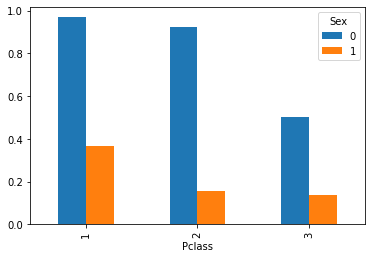

In [18]:
survival_rate_pclass_sex=traindata.groupby(['Pclass','Sex'])['Survived'].mean()
survival_rate_pclass_sex.unstack().plot.bar()

survival_rate_pclass_sex

From the data above, we can conclude that most female passengers in Pclass 1 have survived. Whereas male passengers in Pclass have the lowest survival rate of all at only 13.5%.

## Embarked

Titanic had embarked in order of, S = Southampton, C = Cherbourg (France), and Q = Queenstown (Ireland). 

Ref: https://web.archive.org/web/20120415195436/http://www.chriscunard.com/titanic.php

In [19]:
embarked = traindata.groupby(['Embarked'])['Survived'].mean()

embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked'>

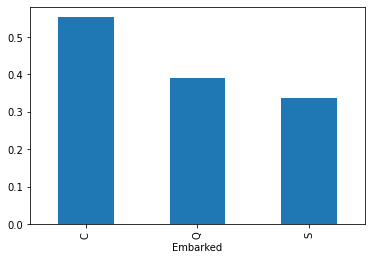

In [20]:
embarked.plot.bar()

From the percentages above, we see that passengers embarked from Southampton have a quite significant difference from the other passengers. Let's take a look at the total passenger embarking from Southampton to see that will give us an idea why.

In [21]:
survived_em = traindata.groupby('Embarked')['Survived'].sum()
passnum = traindata.groupby('Embarked')['Survived'].count()

print(survived_em, passnum)

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64 Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64


Breaking down the survival rate into the total passengers and the survived passengers do not provide us with any clear reason why too. Let's take a look at the other features according to the location embarked.

In [22]:
traindata.groupby('Embarked').mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,0.553571,1.886905,0.565476,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,0.532468,28.089286,0.428571,0.168831,13.276030
S,0.336957,2.350932,0.684783,29.445397,0.571429,0.413043,27.079812


Now from this table, we can see that the average passenger embarking from Cherbourg is paying a higher fare for higher passenger class seats than the passengers embarking from the other 2 location. This can be seen from the mean Pclass of the passengers being closer to the First Class, which explains why they have a higher survival rate compared to the other passengers.

In [23]:
mostemb = []

for data in combine:
    mostemb = data['Embarked'].dropna().mode()[0]
    data['Embarked'] = data['Embarked'].fillna(mostemb)
    data['Embarked'] = data['Embarked'].replace(['C','Q','S'],[0,1,2])

# Continouous Data

Age, SibSp, Parch 

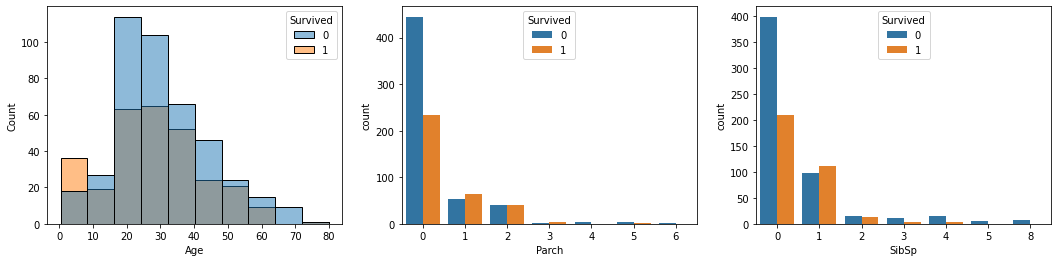

In [24]:
fig, axes = plt.subplots(1,3, figsize=(18,4))

sns.histplot(ax=axes[0], x='Age', data=traindata, bins=10, hue='Survived')
sns.countplot(ax=axes[2], x='SibSp',data = traindata, hue='Survived')
sns.countplot(ax=axes[1], x='Parch',data = traindata, hue='Survived')

ax[0].set_title('Survived vs Sex')

plt.show()

<class 'list'>


<BarContainer object of 3 artists>

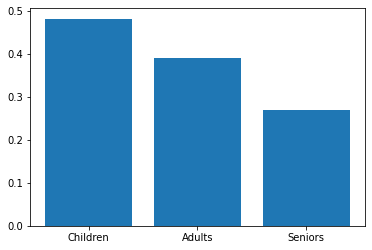

In [25]:
children = traindata[traindata['Age']<=19]
adults = traindata[(traindata['Age']>19) & (traindata['Age']<60)]
senior = traindata[traindata['Age']>=60]

age_groups = [children['Survived'].mean(), adults['Survived'].mean(), senior['Survived'].mean()]
y = ['Children', 'Adults', 'Seniors']

print(type(age_groups))

plt.bar(y, age_groups)

In [26]:
solo = traindata[(traindata['Parch']==0) & (traindata['SibSp']==0)]

mean_solo = solo['Age'].mean()

solo_pct = solo['Survived'].mean()

print('Solo passengers (mean age: {:}) without siblings/spouse or parents/children only have {:.2f}% of survival'.format(int(mean_solo),solo_pct*100))

Solo passengers (mean age: 32) without siblings/spouse or parents/children only have 30.35% of survival


<AxesSubplot:xlabel='Age'>

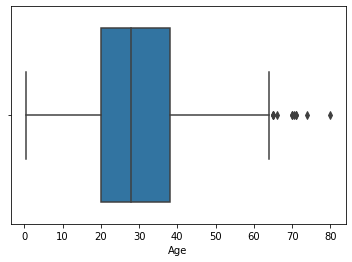

In [27]:
sns.boxplot(x=traindata['Age'])

In [28]:
for data in combine:
    medianage = data['Age'].dropna().median()
    data['Age'] = data['Age'].fillna(medianage)
    
    data['Age_band']=0
    data.loc[data['Age']<=19,'Age_band']=0
    data.loc[(data['Age']>19)&(data['Age']<60),'Age_band']=1
    data.loc[data['Age']>=60,'Age_band']=2

## Fare 

This feature is closely related to the passenger class on Titanic as the higher class the seat is the more expensive it is.

"A third class ticket cost around £7 in 1912 which is nearly £800 in today's money. A second class ticket cost around £13 or nearly £1500 today and a first class ticket would have set you back a minimum of £30 or more than £3300 today." 

Ref: https://www.bbc.co.uk/bitesize/topics/z8mpfg8/articles/zng8jty

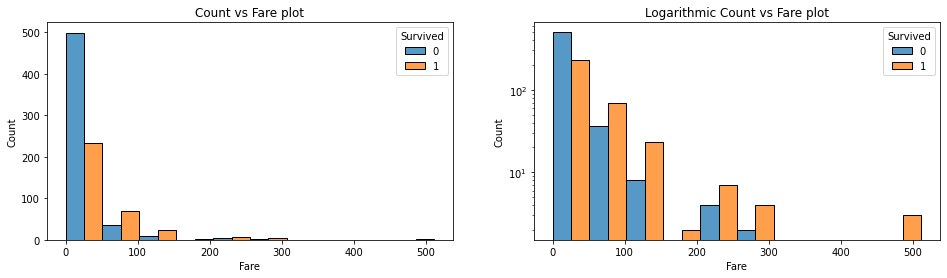

In [29]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

# Set the scale of the x-and y-axes
ax[1].set(yscale="log")
ax[0].set_title('Count vs Fare plot')
ax[1].set_title('Logarithmic Count vs Fare plot')

sns.histplot(ax=ax[0], x='Fare',data = traindata, hue='Survived', bins = 10, multiple = 'dodge')
sns.histplot(ax=ax[1],x='Fare',data = traindata, hue='Survived', bins = 10, multiple = 'dodge')

plt.show()

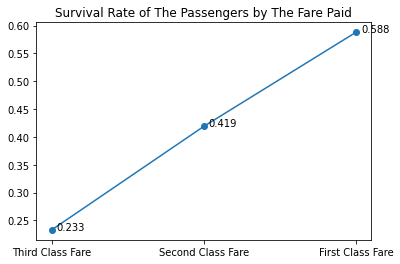

In [30]:
third_mean = round(traindata[traindata['Fare']<13]['Survived'].mean(),3)
second_mean = round(traindata[(traindata['Fare']>=13) & (traindata['Fare']<30)]['Survived'].mean(),3)
first_mean = round(traindata[traindata['Fare']>=30]['Survived'].mean(),3)

labels = ['Third Class Fare', 'Second Class Fare', 'First Class Fare']

plt.plot(labels,[third_mean, second_mean, first_mean],marker='o')
plt.title('Survival Rate of The Passengers by The Fare Paid')

for i, v in enumerate([third_mean, second_mean, first_mean]):
    plt.annotate(str(v), xy=(i,v), xytext=(5,0), textcoords='offset points')

plt.show()

In [31]:
for data in combine:
    medianfare = data['Fare'].dropna().median()
    data['Fare'] = data['Fare'].fillna(medianage)
    
    data['Fare_band']=0
    data.loc[data['Fare']<=13,'Fare_band']=0
    data.loc[(data['Fare']>13)&(data['Fare']<30),'Fare_band']=1
    data.loc[data['Fare']>=30,'Fare_band']=2

# Correlation Plot

Finding out the correlation to the survival of the passengers.

In [32]:
for data in combine:
    data.drop(['Fare','Age'],axis=1,inplace=True)

<AxesSubplot:>

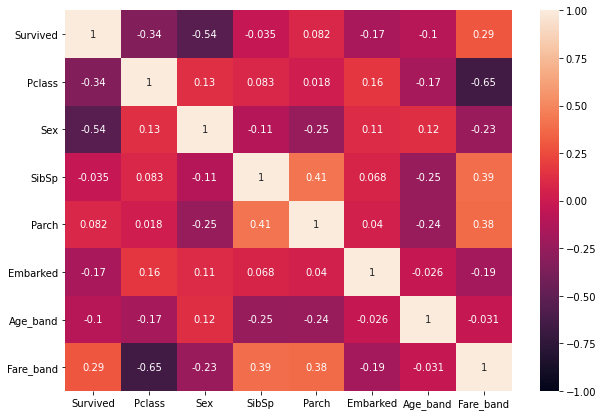

In [33]:
c = traindata.corr()
plt.figure(figsize = (10,7))
sns.heatmap(c,vmin = -1,vmax = 1, annot=True)

# Training and testing models

In [34]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [35]:
score=[]
X_train = traindata.drop("Survived", axis=1)
Y_train = traindata["Survived"]
X_test  = testdata.drop('PassengerId',axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [36]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_band
0,3,1,0,0,1,1,0
1,3,0,1,0,2,1,0
2,2,1,0,0,1,2,0
3,3,1,0,0,2,1,0
4,3,0,1,1,2,1,0
...,...,...,...,...,...,...,...
413,3,1,0,0,2,1,0
414,1,0,0,0,0,1,2
415,3,1,0,0,2,1,0
416,3,1,0,0,2,1,0


In [37]:
#logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
score.append(acc_log)

In [38]:
#support vector classification

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
score.append(acc_svc)

In [39]:
#k-nearest neighbour

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
score.append(acc_knn)

In [40]:
#gaussian naive-bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
score.append(acc_gaussian)

In [41]:
#perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
score.append(acc_perceptron)

In [42]:
#linear support vector classification

linear_svc = LinearSVC(dual = False)
linear_svc.fit(X_train, Y_train)
Y_pred_linsvc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
score.append(acc_linear_svc)

In [43]:
#stochastic gradient descent classifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
score.append(acc_sgd)

In [44]:
#decision tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dtree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
score.append(acc_decision_tree)

In [45]:
#random forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
score.append(acc_random_forest)

In [46]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': score})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Linear SVC,86.98
8,Decision Tree,86.98
2,Logistic Regression,83.84
1,KNN,82.38
0,Support Vector Machines,80.58
5,Perceptron,79.24
6,Stochastic Gradient Decent,78.90
3,Random Forest,76.77
4,Naive Bayes,68.57


In [47]:
submission = pd.DataFrame({
        "PassengerId": testdata["PassengerId"],
        "Survived": Y_pred_linsvc
    })

submission.to_csv('submission.csv', index=False)

In [49]:
import pickle
pickle_out = open("linear_svc.pkl","wb")
pickle.dump(linear_svc, pickle_out)
pickle_out.close()